### Excersice 14 : 3D

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cvxopt

In [9]:
# Synthetic data
mu1_3d = np.array([5,5,20])
mu2_3d  = np.array([5,5,0])
sigma_3d  = np.array([[2,0,0],[0,2,0],[0,0,2]])

X1_3d  = np.random.multivariate_normal(mu1_3d , sigma_3d , 100)
X2_3d  = np.random.multivariate_normal(mu2_3d , sigma_3d , 100)
n = X1_3d.shape[0]+X2_3d.shape[0]

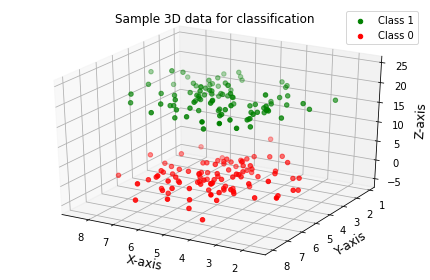

In [10]:
# Plot data
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121,projection='3d')
ax.scatter(X1_3d[:,0],X1_3d[:,1],X1_3d[:,2],color='g', label='Class 1')
ax.scatter(X2_3d[:,0],X2_3d[:,1],X2_3d[:,2],color='r', label='Class 0')
ax.view_init(elev=28, azim = 120)

plt.title('Sample 3D data for classification')
plt.legend()
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)
fig.tight_layout()

In [11]:
# Logistic Regression
X = np.concatenate((np.ones((n,1)),np.concatenate((X1_3d,X2_3d),0)),1)
y = np.concatenate((np.zeros((100,1)), np.ones((100,1))),0)

In [12]:
theta = np.zeros((4,1))
alpha = 0.00001

def sigmod(z):
    return 1.0/(1 + np.exp(z))

def crossentropy(theta, X,y,alpha):
    yhat = sigmod(-X @ theta)
    cost = - (y * np.log(yhat) + (1- y ) * np.log(1-yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

for epoch in range(10000):
    cost, grad_cost = crossentropy(theta,X,y,alpha)
    if epoch % 1000 == 0:
        print('Epoch %d: cost %f' % (epoch, cost))
    theta = theta - alpha * grad_cost

Epoch 0: cost 0.693147
Epoch 1000: cost 0.023090
Epoch 2000: cost 0.012494
Epoch 3000: cost 0.008739
Epoch 4000: cost 0.006786
Epoch 5000: cost 0.005579
Epoch 6000: cost 0.004755
Epoch 7000: cost 0.004154
Epoch 8000: cost 0.003695
Epoch 9000: cost 0.003332


In [13]:
def h(X, theta):
    yhat = sigmod(-X @ theta)
    preds = np.where(yhat >= 0.5, 1, 0)
    return preds

preds = h(X, theta)
accuracy = (preds == y).sum() / y.shape[0]
print('Training set accuracy = %f' % accuracy)

Training set accuracy = 1.000000


In [14]:
# Quadratic Programming
X = np.concatenate((X1_3d,X2_3d),0)
y = np.concatenate((-np.ones((100,1)),np.ones((100,1))),0)
m = X.shape[0]
n = 3

In [15]:
# Set Q, c, A, b
c = np.zeros((n+1,1))
Q = np.eye(n+1)
Q[n,n] = 0
b = - np.ones((m,1))
A = - np.concatenate((X, np.ones((m,1))),1) * y

In [16]:
def cvxopt_solve_qp(Q, c, A=None, b=None):
    Q = .5 * (Q + Q.T)
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

opt_params = cvxopt_solve_qp(Q, c, A, b)

     pcost       dcost       gap    pres   dres
 0:  4.9141e-03  1.0350e+01  4e+02  1e+00  3e+03
 1:  2.9018e-02 -1.4093e+01  1e+01  5e-02  1e+02
 2:  3.0147e-02 -1.4820e-01  2e-01  5e-04  1e+00
 3:  2.1116e-02  2.0731e-03  2e-02  5e-16  5e-16
 4:  1.2909e-02  6.7806e-03  6e-03  3e-16  3e-16
 5:  1.2991e-02  1.0767e-02  2e-03  2e-16  2e-15
 6:  1.2311e-02  1.2235e-02  8e-05  2e-16  8e-16
 7:  1.2301e-02  1.2300e-02  1e-06  2e-16  2e-15
 8:  1.2301e-02  1.2301e-02  1e-08  2e-16  6e-15
Optimal solution found.


In [17]:
w = opt_params[0:3]
b = opt_params[3]

In [18]:
def g(X, w,b):
    _g = w.T@X.T + b
    preds = np.where(_g >= 0, 1, -1)
    return preds

preds = g(X, w, b)
accuracy = (preds == y).sum() / y.shape[0]
print('Training set accuracy = %f' % accuracy)

Training set accuracy = 100.000000


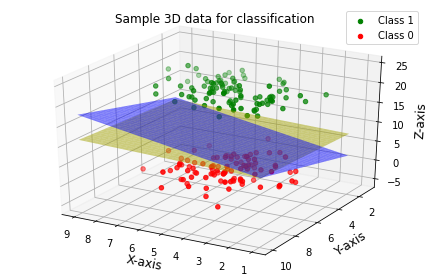

In [19]:
# Plot result
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121,projection='3d')

ax.scatter(X1_3d[:,0],X1_3d[:,1],X1_3d[:,2],color='g', label='Class 1')
ax.scatter(X2_3d[:,0],X2_3d[:,1],X2_3d[:,2],color='r', label='Class 0')

x_plot = np.linspace(1,9,30)
y_plot = np.linspace(2,10,30)
xx, yy = np.meshgrid(x_plot, y_plot)

# Logistic Reression
z = (-theta[0] - theta[1]*xx - theta[2]*yy)/theta[3]
ax.plot_surface(xx, yy, z, alpha=0.5,color='b')

# Quadratic Programming
z = (-w[0]*xx - w[1]*yy - b)/w[2]
ax.plot_surface(xx, yy, z, alpha=0.5,color='y')

plt.title('Sample 3D data for classification')
plt.legend()
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)

ax.view_init(elev=28, azim=120)

#for ii in np.arange(0, 360, 1):
    #ax.view_init(elev=32, azim=ii)
    #fig.savefig('gif_%d.png' % ii)


fig.tight_layout()

<div> <img src="ezgif.com-gif-maker.gif" alt="Drawing" style="width: 1600px;"/></div>